## MoS<sub>2</sub> Hamiltonian around $\Gamma$

\begin{equation}
  H=bt( k_{x} \sigma _{x} +k_{y} \sigma _{y}) +\frac{E_{g}}{2} \sigma _{z} -\Delta _{SO}\frac{\sigma _{z} -1}{2} s_{z}
\end{equation}

In [1]:
#======================================================================
# Basic Parameters , packages & Working Functions --> ALWAYS EXECUTE
#======================================================================

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.physics.quantum import TensorProduct


# Parameters
b = 3.193   # angstrom
t = 1.10    # eV
Eg = 1.66   # eV
DeltaSO = 0.15/2   # eV
hbar = 6.582e-16 # eV s

# Pauli Matrices
sig_x = np.array([[0+0j,1+0j],[1+0j,0+0j]])
sig_y = np.array([[0+0j,0-1j],[0+1j,0+0j]])
sig_z = np.array([[1+0j,0+0j],[0+0j,-1+0j]])
sz = (-hbar/2) * sig_z
# sz = np.array([[1,0],[0,-1]])
#-----------------------------

# Generate Hamiltonian
#-----------------------------
def mount_Hamiltoninan(kx,ky,valley):
  # DeltaSO = 0.15
  # k = np.array((kx,ky))
  if valley:
    tau = 1
  else:
    tau = -1

  I = b*t* (tau*kx *sig_x + ky *sig_y)                 # First term
  II = Eg*sig_z/2                                      # Second term
  III = DeltaSO * tau*((sig_z-1)/2)* (-1)              # Third term
  # III = TensorProduct(sz,III)

  H = (I + II - III)
  return H

#---------------------------------------------

# Calculate Berry phase BETWEEN 2 DIFFERENT energy levels
#---------------------------------------------
def compute_berry_curvature(Psi1,Psi2, dx,dy, E1):

    print(f'psi1 shape: {Psi1[:,:,0].shape}')
    gradX1 = -1j*np.gradient(Psi1[:,:,0],dx,dy)[0]
    gradY1 = -1j*np.gradient(Psi1[:,:,1],dx,dy)[1]
    gradX2 = -1j*np.gradient(Psi2[:,:,0],dx,dy)[0]
    gradY2 = -1j*np.gradient(Psi2[:,:,1],dx,dy)[1]

    print(f'grad shape: {gradX1.shape}')

    braketX1 = np.conjugate(Psi1[:,:,0][0])*gradX2
    braketY1 = np.conjugate(Psi1[:,:,0][1])*gradY2
    braket1 = braketX1+braketY1

    braketX2 = np.conjugate(Psi2[:,:,0][0])*gradX1
    braketY2 = np.conjugate(Psi2[:,:,0][1])*gradY1
    braket2 = braketX2+braketY2


    berry_curvature =  2*(braket1*braket2)/(E1[:,:,0]-E1[:,:,1])
    print(f'BerryC shape: {berry_curvature.shape}')
    # print(berry_curvature)
    return berry_curvature.imag
#---------------------------------------------

# Calculate Berry phase BETWEEN ALL energy levels
#---------------------------------------------
def All_berry_curvature(states, dx,dy, E1,E2):

    print(f'states shape: {states[0][:,:,0].shape}')
    gradX = np.zeros((len(states[0]),len(states[0]),len(states)))
    gradY = np.zeros((len(states[0]),len(states[0]),len(states)))

    for i in range(len(states)):
      gradX[:,:,i] = -1j*np.gradient(states[i][:,:,0],dx,dy)[0]
      gradY[:,:,i] = -1j*np.gradient(states[i][:,:,0],dx,dy)[1]

    print(f'grad shape: {gradX.shape}')

    braketX = np.conjugate(states[0][:,:,0][0])*gradX[:,:,1]
    braketY = np.conjugate(states[0][:,:,0][1])*gradY[:,:,1]
    braket12 = braketX+braketY

    braketX = np.conjugate(states[1][:,:,0][0])*gradX[:,:,0]
    braketY = np.conjugate(states[1][:,:,0][1])*gradY[:,:,0]
    braket21 = braketX+braketY

    braketX = np.conjugate(states[2][:,:,0][0])*gradX[:,:,3]
    braketY = np.conjugate(states[2][:,:,0][1])*gradY[:,:,3]
    braket23 = braketX+braketY

    braketX = np.conjugate(states[3][:,:,0][0])*gradX[:,:,2]
    braketY = np.conjugate(states[3][:,:,0][1])*gradY[:,:,2]
    braket32 = braketX+braketY


    # braketX = np.conjugate(states[4][:,:,0][0])*gradX1[:,:,4]
    # braketY = np.conjugate(states[4][:,:,0][1])*gradY1[:,:,4]
    # braket5 = braketX+braketY

    braket = [braket12,braket21,braket23,braket32]

    berry_curvature = 0
    berry_curvature += (braket[0]*braket[1]).imag/(E1[:,:,0]-E1[:,:,1])**2
    berry_curvature += (braket[2]*braket[3]).imag/(E2[:,:,0]-E2[:,:,1])**2
    # berry_curvature += (braket[3]*braket[4]).imag/(E1[:,:,1]-E2[:,:,1])**2

    print(f'BerryC shape: {berry_curvature.shape}')
    # print(berry_curvature)
    return (-2)*(berry_curvature)
#---------------------------------------------

# Calculate Berry phase on SAME energy level
# <du/dx|du/dy>
#---------------------------------------------
def berry_curvatureRot(Psi1, dx,dy):
    print(f'psi1 shape: {Psi1[:,:,0].shape}')
    gradX1 = 1j*np.gradient(Psi1[:,:,0],dx,dy)[0]
    gradY1 = 1j*np.gradient(Psi1[:,:,1],dx,dy)[0]

    gradX2 = 1j*np.gradient(Psi1[:,:,0],dx,dy)[1]
    gradY2 = 1j*np.gradient(Psi1[:,:,1],dx,dy)[1]

    print(f'grad shape: {gradX1.shape}')

    gradX = np.array([gradX1,gradY1])

    gradY = np.array([gradX2,gradY2])

    braket = np.conjugate(gradX)*gradY
    # braketY1 = np.conjugate(gradX1)*gradY1
    # braket1 = -braketX1-1j*braketY1

    berry_curvature = braket
    print(f'BerryC shape: {berry_curvature.shape}')
    # print(berry_curvature)
    return berry_curvature
#---------------------------------------------

# Gather Hamiltonian & etc for a KxKy mesh and plot
#---------------------------------------------
def plot_dispersion(n,BZlim,spin):
    # Generate a mesh
    kx_range = np.linspace(-BZlim, BZlim, num=n)
    ky_range = np.linspace(-BZlim, BZlim, num=n)

    # Get the number of levels with a dummy call (an NxN square matrix has N levels)
    num_levels = len(mount_Hamiltoninan(1,1,True))
    # energies = np.zeros((m,n,num_levels)); # initialize
    Psi1 = np.zeros((n,n,num_levels), dtype=complex)
    Psi2 = np.zeros((n,n,num_levels), dtype=complex)
    energies = np.zeros((n,n,num_levels), dtype=complex)
    # Now iterate over discretized mesh, to consider each coordinate.
    for i in range(n):
      for j in range(n):
        H = mount_Hamiltoninan(kx_range[i],ky_range[j],spin);
        evals, evec = LA.eig(H) # Numerically get eigenvalues and eigenvectors
        energies[j,i,:]=evals
        Psi1[j,i] = evec[0] # CBM
        Psi2[j,i] = evec[1] # VBM

    return energies,Psi1,Psi2,kx_range

[ 0.83081014+0.j -0.90581014+0.j]


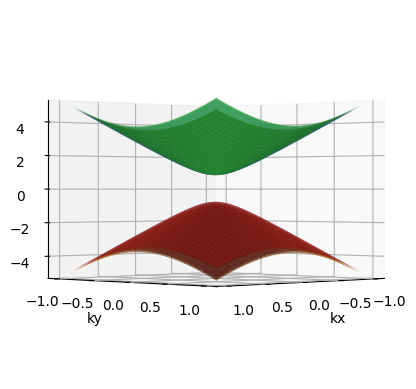

In [6]:
# Run it!
res = 101

energies1,Psi1,Psi2,kx_range=plot_dispersion(res,1,True)
energies2,Psi1,Psi2,kx_range=plot_dispersion(res,1,False)
print(energies1[int(res/2),int(res/2)])

ky_range = kx_range
X, Y = np.meshgrid(kx_range, ky_range) # Generate actual mesh for plotting.
# Plot! There are several ways to style this.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=45, roll=0)


# ax.axis([X.min(), X.max(), Y.min(), Y.max()])
transparency = 0.7 #transparency

ax.plot_surface(X, Y, energies1[:,:,0], alpha=transparency, antialiased=True)
ax.plot_surface(X, Y, energies1[:,:,1], alpha=transparency, antialiased=True)

ax.plot_surface(X, Y, energies2[:,:,0], alpha=transparency, antialiased=True)
ax.plot_surface(X, Y, energies2[:,:,1], alpha=transparency, antialiased=True)

ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('E')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


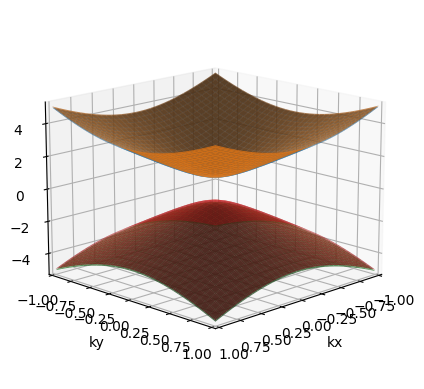

In [10]:
#-----------------------------
# Plotting band dispersion
#-----------------------------
X, Y = np.meshgrid(kx_range, ky_range) # Generate actual mesh for plotting.
# Plot! There are several ways to style this.
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=45, roll=0)
num_levels = len(mount_Hamiltoninan(0,0,True))
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
transparency = 0.7 #transparency
for band in range(num_levels):
  ax.plot_surface(X, Y, energies1[:,:,band], alpha=transparency, antialiased=True, label="c")
  ax.plot_surface(X, Y, energies2[:,:,band], alpha=transparency, antialiased=True, label="c")
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('E')
plt.show()

# Bandas pela diagonalização

<ipython-input-11-07af5ef313f0>:19: ComplexWarning: Casting complex values to real discards the imaginary part
  Psi[j,i,:] = evecs[0]
<ipython-input-11-07af5ef313f0>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  proj_Psi[i,j,:] = sz @ evecs[1]
<ipython-input-11-07af5ef313f0>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[j,i,:]=evals;


(51, 51, 51)
(51, 51, 51)


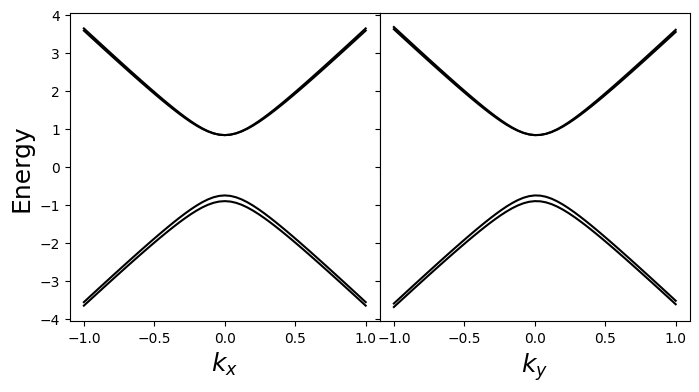

In [11]:
#--------------------------------------------
# Plotting band dispersion, but in 2D
#--------------------------------------------

def plot_dispersion2D(m,n,BZx1,spin):
    # Generate a mesh
    kx_range = np.linspace(BZx1, -BZx1, num=m)
    ky_range = np.linspace(BZx1, -BZx1, num=n)
    # Get the number of levels with a dummy call (an NxN square matrix has N levels)
    num_levels = len(mount_Hamiltoninan(1,1,True))
    energies = np.zeros((m,n,num_levels)); # initialize
    proj_Psi = np.zeros((m,n,num_levels)); # initialize
    Psi = np.zeros((m,n,num_levels)); # initialize
    # Now iterate over discretized mesh, to consider each coordinate.
    for i in range(m):
      for j in range(n):
        H = mount_Hamiltoninan(kx_range[i],ky_range[j],spin);
        evals, evecs = LA.eig(H); # Numerically get eigenvalues and eigenvectors
        Psi[j,i,:] = evecs[0]
        proj_Psi[i,j,:] = sz @ evecs[1]
        energies[j,i,:]=evals;

    proj = np.inner(np.conjugate(Psi), proj_Psi)

    evals = LA.eigvals(proj)
    print(evals.shape)
    return energies,kx_range, num_levels


# Run it!
BZx1=1
res = 51
energies1,kx_range, num_levels = plot_dispersion2D(res,res,BZx1,True)
energies2,kx_range, num_levels = plot_dispersion2D(res,res,BZx1,False)

# Plot! There are several ways to style this.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4),
                              sharey=True
                              )
K = int(res/2)
for band in range(num_levels):
  ax1.plot(kx_range, energies1[:,K,band], color='k')   # plot kx bands for ky=0
  ax1.plot(kx_range, energies2[:,K,band], color='k')   # plot kx bands for ky=0

  ax2.plot(kx_range, energies1[K,:,band], color='k')   # plot ky bands for kx=0
  ax2.plot(kx_range, energies2[K,:,band], color='k')   # plot ky bands for kx=0

ax1.set_ylabel('Energy',fontsize=18)
ax1.set_xlabel(r'$k_x$',fontsize=18)
ax2.set_xlabel(r'$k_y$',fontsize=18)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# O gap parece ok.... por volta de 2 eV

Eigenvalues given:
\begin{equation}
  E = \pm \sqrt{(\hbar v_f |\vec{k}|)^2 + \Delta_{SO}^2}
\end{equation}

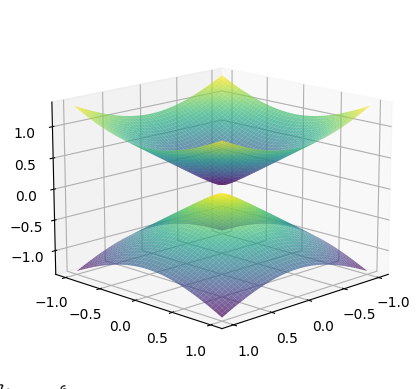

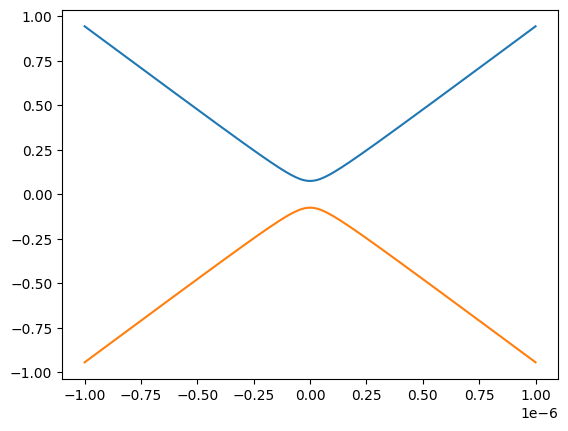

In [12]:
#--------------------------------------------
#  Testing Eigenvalues given by the paper
#--------------------------------------------
b = 3.193*1e-10   # angstrom to m
t = 1.10          # eV
Eg = 1.66         # eV
DeltaSO = 0.15/2  # eV
# DeltaSO = 1e5    # eV

hbar = 6.582-16   # eV s
vf = 1e5         # m/s

res = 200
kx = (np.linspace(-1, 1, res))*1e-6  # deve estar em 1/m
ky = (np.linspace(-1, 1, res))*1e-6  # deve estar em 1/m
E1 = np.zeros((res,res))

for i in range(len(kx)):
  for j in range(len(ky)):
    A = (hbar*vf*np.sqrt(kx[i]**2 + ky[j]**2))
    E1[i,j] = np.sqrt(A**2 + DeltaSO**2)

    if E1[i,j] == 0:
      print(f'kx,ky = {kx[i]},{ky[i]}\nE = {E1[i,j]}')


X, Y = np.meshgrid(kx, ky)
E2 = -E1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=45, roll=0)

ax.plot_surface(X,Y,E1, alpha=0.7, cmap='viridis')
ax.plot_surface(X,Y,E2, alpha=0.7, cmap='viridis')

fig, ax = plt.subplots()
ax.plot(kx,E1[:,100])
ax.plot(kx,E2[:,100])

# ax.set_xlim(-0.1,0.1)
# ax.set_ylim(-1,1)

plt.show()

# Spin Projected Bands

(51, 51, 2)


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


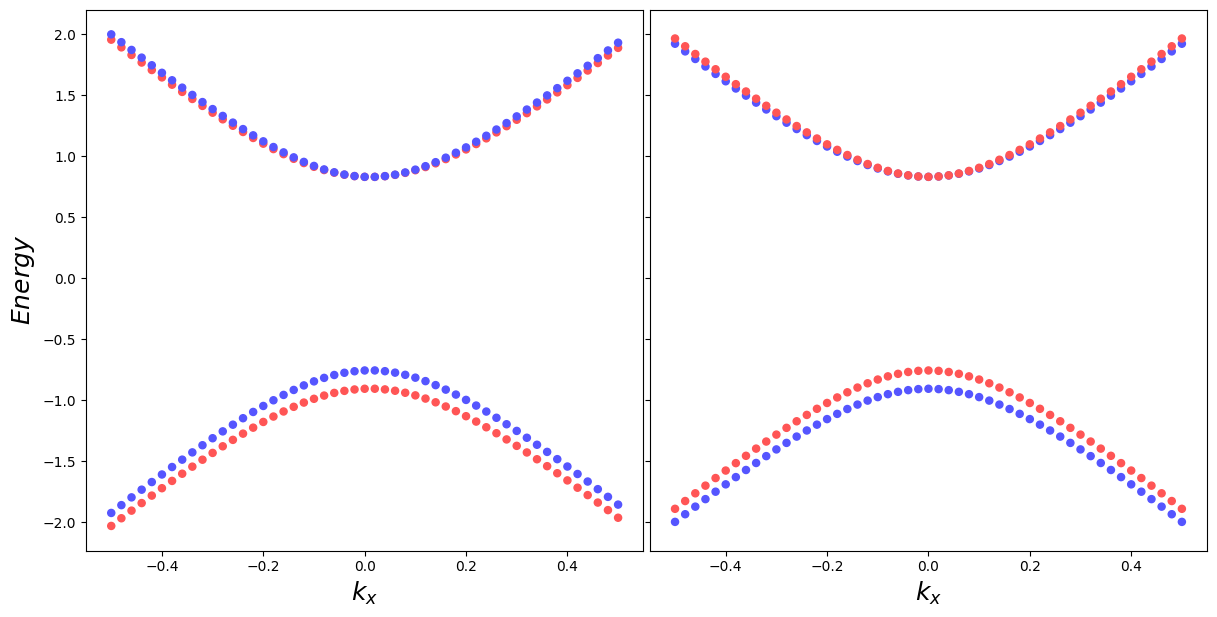

In [ ]:
'''
  Projeção de bandas por spin
  braket <psi | sigz | psi>
'''


res = 51

energies1,PsiV1,PsiC1,kx_range =plot_dispersion(res,0.5,True)
energies2,PsiV2,PsiC2,kx_range =plot_dispersion(res,0.5,False)
print(energies1.shape)

X,Y = np.meshgrid(kx_range,kx_range)
# bloch1= np.zeros((res,res))
# bloch2= np.zeros((res,res))

# projPsi = np.zeros((res,res,2))
proj1T = np.zeros((res,res))
proj2T = np.zeros((res,res))
for i in range(res):
  for j in range(res):
    proj1 = np.inner(np.conjugate(PsiV1[j,i]), PsiV1[j,i])
    proj2 = np.inner(np.conjugate(PsiV2[j,i]),(-1)* PsiV2[j,i])

    # bloch1[i,j] = np.inner(np.conjugate(Psi1[i,j]),Psi2[i,j])
    # bloch2[i,j] = np.inner(np.conjugate(Psi2[i,j]),Psi2[i,j])

    if proj1 > 0:
      # print('up!')
      proj1T[j,i] = 1
    else:

      proj1T[j,i] = -1

    if proj2 > 0:
      # print('DOWN!')
      proj2T[j,i] = -1
    else:
      proj2T[j,i] = -1


# print(f'Bloch Psi: {bloch1.shape}')

K = int(res/2)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=15, azim=45, roll=0)
# cbar = ax.scatter(X,Y, energies1[:,:,1],c=projPsi[:,:,0],vmin=-1,vmax=1,cmap='seismic')
# cbar = ax.scatter(X,Y, energies2[:,:,1],c=projPsi[:,:,1],vmin=-1,vmax=1,cmap='seismic')
# plt.colorbar(cbar)

fig, (ax1,ax2) = plt.subplots(1,2,
                              sharey=True,
                              figsize=(12,6))

#------------------------------------Kx----------------------------------------------------
ax1.scatter(kx_range, energies1[K,:,0],c=proj1T[K,:],vmin=-3,vmax=3,cmap='seismic',s=26)
ax1.scatter(kx_range, energies1[K,:,1],c=proj1T[K,:],vmin=-3,vmax=3,cmap='seismic',s=26)

ax1.scatter(kx_range, energies2[K,:,0],c=proj2T[K,:],vmin=-3,vmax=3,cmap='seismic',s=26)
ax1.scatter(kx_range, energies2[K,:,1],c=proj2T[K,:],vmin=-3,vmax=3,cmap='seismic',s=26)

#------------------------------------Ky----------------------------------------------------
ax2.scatter(kx_range, energies1[:,K,0],c=-proj1T[:,K],vmin=-3,vmax=3,cmap='seismic',s=26)
ax2.scatter(kx_range, energies1[:,K,1],c=-proj1T[:,K],vmin=-3,vmax=3,cmap='seismic',s=26)

ax2.scatter(kx_range, energies2[:,K,0],c=-proj2T[:,K],vmin=-3,vmax=3,cmap='seismic',s=26)
ax2.scatter(kx_range, energies2[:,K,1],c=-proj2T[:,K],vmin=-3,vmax=3,cmap='seismic',s=26)

ax1.set_xlabel(r'$k_x$',fontsize=18)
ax1.set_ylabel(r'$Energy$',fontsize=18)
ax2.set_xlabel(r'$k_x$',fontsize=18)
# ax.set_zlabel(r'$Energy$',fontsize=18)




fig.tight_layout(pad=0.1)
plt.show()

# Berry Curvature
Via analytic expression

\begin{equation}
  \Omega_c (\vec{k}) = \mp \frac{2b^2 t^2 E'_g}{(E'^2_g +4b^2 t^2 k^2)^{3/2}}
\end{equation}
and
\begin{equation}
  \Omega_v (\vec{k}) = - \Omega_c (\vec{k})
\end{equation}


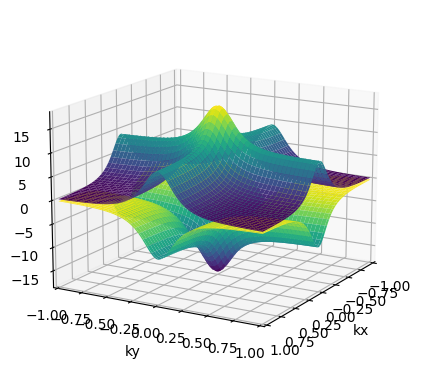

In [ ]:
#--------------------------------------------
#  Testing Berry given by the paper
#--------------------------------------------
b = 3.193
t = 1.10
Eg = 1.66
DeltaSO = 0.15/2

Effgap = Eg - sz*DeltaSO # signal is -+

hbar = 6.582e-16 # eV s
vf = 1e7 # m/s

def BerryCurve(kx, ky):
  top = 2*b**2 * t**2 * Effgap
  bottomX = Effgap**2 + (2*b*t*kx)**2

  bottomY = Effgap**2 + (2*b*t*ky)**2

  BerryC = np.zeros(2)
  BerryC[0] = - top[0,0]/(np.sqrt(bottomX[0,0])**3) # signal is -+
  BerryC[1] = - top[0,0]/(np.sqrt(bottomY[0,0])**3) # signal is -+

  # eigen = LA.eigvals(BerryC)

  return BerryC

def plot_dispersion(m,n,BZx1,BZx2,BZy1,BZy2):
    # Generate a mesh
    kx_range = np.linspace(BZx1, BZx2, num=m)
    ky_range = np.linspace(BZy1, BZy2, num=n)
    # Get the number of levels with a dummy call (an NxN square matrix has N levels)
    # num_levels = len(BerryCurve(1,1))
    BCX = np.zeros((m,n)); # initialize
    BCY = np.zeros((m,n));
    BC1 = np.zeros((m,n));
    # Now iterate over discretized mesh, to consider each coordinate.
    for i in range(m):
      for j in range(n):
        BCX[i, j] = BerryCurve(kx_range[i],ky_range[j])[0]
        BCY[i, j] = BerryCurve(kx_range[i],ky_range[j])[1]
        # BC1[i, j] = BerryCurve(kx_range[i],ky_range[j])

    # BV1 = -BC1
    BVX = -BCX
    BVY = -BCY

    X, Y = np.meshgrid(kx_range, ky_range) # Generate actual mesh for plotting.

    # Plot! There are several ways to style this.
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=15, azim=30, roll=0)

    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    transparency = 0.8 #transparency

    ax.plot_surface(X, Y, BCY+BCX, antialiased=True, label="BC0", cmap='viridis')
    ax.plot_surface(X, Y, BVY+BVX, antialiased=True, label="BC0", cmap='viridis')
    ax.set_xlabel('kx')
    ax.set_ylabel('ky')
    ax.set_zlabel('E')

    plt.show()

# Run it!
BZx1=-1;
BZx2=+1;
BZy1=-1;
BZy2=+1;

res = 100
plot_dispersion(res,res,BZx1,BZx2,BZy1,BZy2)

# Curvatura de Berry
by definition

\begin{equation}
  \Omega =
    \nabla_k \times
    \langle
      u_n (\vec{k}) | i\nabla_k | u_n (\vec{k})
    \rangle
\end{equation}

\begin{equation}
  \Omega =
    \langle
      u_n' (\vec{k}) | i\nabla_x | u_n (\vec{k})
    \rangle
    \langle
      u_n (\vec{k}) | i\nabla_y | u_n' (\vec{k})
    \rangle
\end{equation}

PsiC1 shape: (101, 101, 2)
psi1 shape: (101, 101)
grad shape: (101, 101)
BerryC shape: (2, 101, 101)
psi1 shape: (101, 101)
grad shape: (101, 101)
BerryC shape: (2, 101, 101)


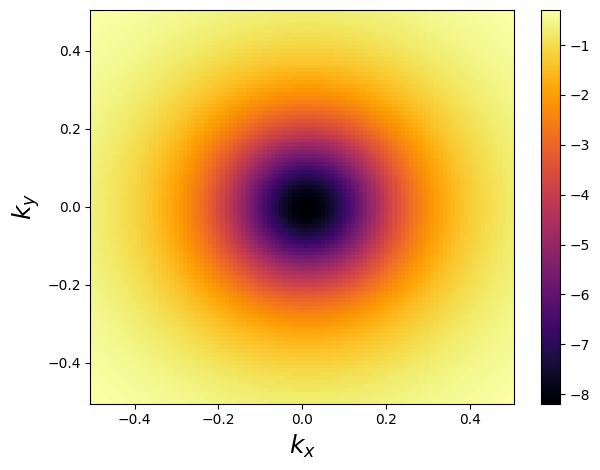

In [ ]:
#=================================
'''
    Plota Berry phase!
'''
#=================================


BZlim = 0.5
res = 101

energies1,PsiC1,PsiV1,kx_range = plot_dispersion(res,BZlim,True)
energies2,PsiC2,PsiV2,kx_range =plot_dispersion(res,BZlim,False)

print(f'PsiC1 shape: {PsiC1.shape}')

# BerryC = compute_berry_curvature(PsiV1,PsiC1, kx_range,kx_range, energies1)
# BerryC2 = compute_berry_curvature(PsiV2,PsiC2, kx_range,kx_range, energies2)

BerryC1 = berry_curvatureRot(PsiC1,kx_range,kx_range)
BerryC2 = berry_curvatureRot(PsiV1,kx_range,kx_range)


BerryC = -2*(BerryC1 + BerryC2).imag[0]

# states = [PsiV1,PsiC1,PsiV2,PsiC2]
# BerryC = All_berry_curvature(states, kx_range, ky_range, energies1,energies2)
# print(f'States: {len(states[0])}')
# BerryC = All_berry_curvature(states, kx_range, ky_range, energies1,energies2)


# TotalBerryC = -2* (BerryC1+BerryC2+BerryC3+BerryC4).imag

X, Y = np.meshgrid(kx_range, kx_range) # Generate actual mesh for plotting.
#===========================================================
fig, ax = plt.subplots(tight_layout=True)
K = int(res/2)
# ax1.plot(kx_range,BerryC[:,K], lw=4)
# ax2.plot(kx_range,BerryC[K,:], lw=4)

# ax1.set_xlabel(r'$k_y$',fontsize=18)
# ax1.set_ylabel(r'$\Omega (\vec{k})$',fontsize=18)

cbar = ax.pcolormesh(X,Y,-BerryC,cmap='inferno')
plt.colorbar(cbar)
ax.set_xlabel(r'$k_x$',fontsize=18)
ax.set_ylabel(r'$k_y$',fontsize=18)

plt.show()

# Density of States

In [ ]:
'''
  Tentando calcular Densidade de Estados de acordo com Juanjo

  Gk=Id*(E-im)-H
      call zgetrf(N,N,Gk,N,IPIV,INFO)
      call zgetri(N,Gk,N,IPIV,WORK,LWORK,INFO)
      do i=1,n
        trace(i)=imagpart(Gk(i,i))
      end do
      DOS=sum(trace)/pi
'''



delta = 0.02 # broadening
im = 0.0 + delta*1j
Id = np.identity(2)
# Generate a mesh
m = 51
n = 51
kx_range = np.linspace(-1, 1, num=m)
ky_range = np.linspace(-1, 1, num=n)

Etotal = np.array([])
dE = 0.01
E = np.arange(-4,4,dE)

dosT = np.array([])
dos = np.zeros((m,n))

for e in E:
  temp = 0
  for i in range(m):
    for j in range(n):
      H = mount_Hamiltoninan(kx_range[i],ky_range[j],True)
      Gr = Id*(e-im)-H
      invGr = LA.inv(Gr)
      dos[i,j] = np.trace(invGr).imag/np.pi
      temp += dos[i,j]

  dosT = np.append(dosT, temp/m)

fig, ax = plt.subplots()
ax.plot(E, dosT)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Energy',fontsize=18)
ax.set_ylabel('DOS',fontsize=18)
ax.axhline(0,color='gray',ls='--',alpha=0.7)


# Conductivity

psi1 shape: (101, 101)
grad shape: (101, 101)
BerryC shape: (2, 101, 101)
psi1 shape: (101, 101)
grad shape: (101, 101)
BerryC shape: (2, 101, 101)
psi1 shape: (101, 101)
grad shape: (101, 101)
BerryC shape: (2, 101, 101)
psi1 shape: (101, 101)
grad shape: (101, 101)
BerryC shape: (2, 101, 101)
BerryC FINAL shape: (101, 101)
sigma shape: (101,)


Text(0.5, 0, '$\\sigma$')

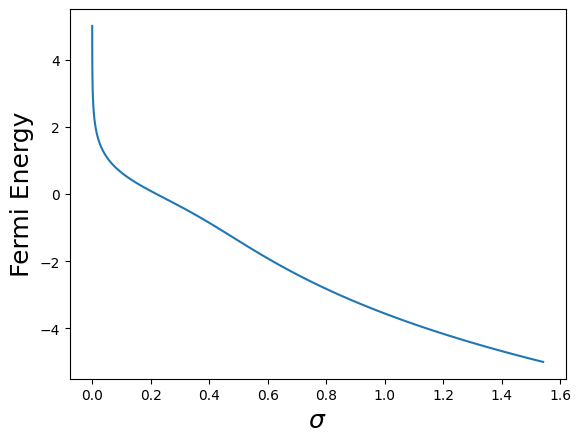

In [ ]:
'''
  Tentando Calcular Condutividade
'''
import scipy as sp
def conductivity(BV1,BV2,BC1,BC2,k_path,E1,E2):
  EV1 = E1[:,1]
  EC1 = E1[:,0]

  EV2 = E2[:,1]
  EC2 = E2[:,0]

  Ef = np.linspace(-5,5,len(E1))
  F_DV1 = np.exp(EV1-Ef)
  F_DV2 = np.exp(EV2-Ef)

  F_DC1 = np.exp(EC1-Ef)
  F_DC2 = np.exp(EC2-Ef)

  sigma = np.zeros(len(Ef), dtype=complex)
  for i in range(len(Ef)):
    integrand = F_DV1[i]*(BV1)+F_DV2[i]*(BV2)
    # print(f'integrand Shape: {integrand.shape}')
    sigma[i] = sp.integrate.simpson(integrand,k_path)
  return sigma, Ef

# Run it!
BZ=1;

res = 101
E1,PsiC1,PsiV1,kx_range = plot_dispersion(res,BZ,True)
E2,PsiC2,PsiV2,kx_range = plot_dispersion(res,BZ,False)

K = int(res/2)
BerryCV1 = berry_curvatureRot(PsiV1,kx_range,kx_range)[0].imag
BerryCV2 = berry_curvatureRot(PsiV2,kx_range,kx_range)[0].imag

BerryCC1 = berry_curvatureRot(PsiC1,kx_range,kx_range)[0].imag
BerryCC2 = berry_curvatureRot(PsiC2,kx_range,kx_range)[0].imag

# BerryCup = -2*(BerryCV1 + BerryCC2).imag[0]
# BerryCdown = -2*(BerryCV2 + BerryCC1).imag[0]
print(f'BerryC FINAL shape: {BerryCV2.shape}')

K = int(res/2)
sigma, Ef = conductivity(BerryCV1[:,K],
                          BerryCV2[:,K],
                          BerryCC1[:,K],
                          BerryCC2[:,K],
                          kx_range,
                          E1[:,K,:],
                          E2[:,K,:])

print(f'sigma shape: {sigma.shape}')

fig,ax = plt.subplots()
# for i in range(len(sigma[0])):
#   ax.scatter(sigma[:,i],Ef,color='blue')
ax.plot(sigma,Ef)
# ax.pcolormesh(sigma)

ax.set_ylabel('Fermi Energy', fontsize=18)
ax.set_xlabel(r'$\sigma$', fontsize=18)

In [ ]:
H1= mount_Hamiltoninan(-0.5,-1)
H2= mount_Hamiltoninan(-0.5,-0.5)

H3= mount_Hamiltoninan(-0.2,-1)
H4= mount_Hamiltoninan(0.2,0.5)

H5= mount_Hamiltoninan(0.5,-1)
H6= mount_Hamiltoninan(0.5,0.5)

eval,evec1 = LA.eig(H1)
eval,evec2 = LA.eig(H2)
eval,evec3 = LA.eig(H3)
eval,evec4 = LA.eig(H4)
eval,evec5 = LA.eig(H4)
eval,evec6 = LA.eig(H4)

evecs = np.array([[evec1[0],evec2[0]],[evec3[0],evec4[0]],[evec5[0],evec6[0]]])

print(f'Evecs: {evecs.shape}\n')
# gradX = 1j*np.gradient(evec[0])
dx = 0.1
dy = 0.1

gradX = 1j*np.gradient(evecs[:,0].flatten()).reshape(len(evecs),-1)
gradY =  1j*np.gradient(evecs[:,1].flatten()).reshape(len(evecs),-1)


print(f'gradX: {gradX}\n')
print(f'gradY: {gradY}\n')

# grad = [gradX[0],gradY[0]]

# braket = np.inner(np.conjugate(evec[0]),grad)
braketX = np.inner(np.conjugate(evecs[:,0]),gradX)
braketY = np.inner(np.conjugate(evecs[:,1]),gradY)

# curl = np.array([np.gradient(braket), -1*np.gradient(braket)])

BerryC =  braketX*braketY


# BerryC = curl[0]


print(f'braketX: {braketX}\n')
print(f'braketY: {braketY}\n')
# print(f'curl: {curl}\n')
print(f'BerryC: {BerryC}\n')

print('=============================')
a = 2j
b = 3j
c = a*b
print(f'{np.array([a,b])}')

Evecs: (3, 2, 2)

gradX: [[-0.68738337-8.72950396e-01j  0.        +5.55111512e-17j]
 [ 0.66256917+2.35621340e-01j -0.        -1.11022302e-16j]
 [-0.31887749+2.00853858e-01j  0.        +2.22044605e-16j]]

gradY: [[ 0.+0.00000000e+00j -0.-5.55111512e-17j]
 [ 0.+5.55111512e-17j  0.+0.00000000e+00j]
 [ 0.+0.00000000e+00j  0.+2.22044605e-16j]]

braketX: [[-0.48605344-0.61726914j  0.46850716+0.16660945j -0.22548043+0.14202513j]
 [-0.48605344-0.61726914j  0.46850716+0.16660945j -0.22548043+0.14202513j]
 [-0.48605344-0.61726914j  0.46850716+0.16660945j -0.22548043+0.14202513j]]

braketY: [[0.-3.92523115e-17j 0.+3.92523115e-17j 0.+1.57009246e-16j]
 [0.-3.92523115e-17j 0.+3.92523115e-17j 0.+1.57009246e-16j]
 [0.-3.92523115e-17j 0.+3.92523115e-17j 0.+1.57009246e-16j]]

BerryC: [[-2.42292407e-17+1.90787211e-17j -6.53980592e-18+1.83899888e-17j
  -2.22992578e-17-3.54025130e-17j]
 [-2.42292407e-17+1.90787211e-17j -6.53980592e-18+1.83899888e-17j
  -2.22992578e-17-3.54025130e-17j]
 [-2.42292407e-17+1.9

0.02020202020202022
Evecs shape:(100, 2)
BerryC shape: (100, 2)


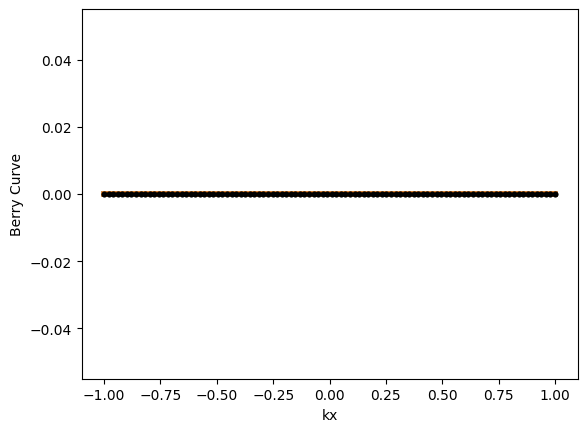

0.02020202020202022
Evecs shape:(100, 2)
BerryC shape: (100, 2)


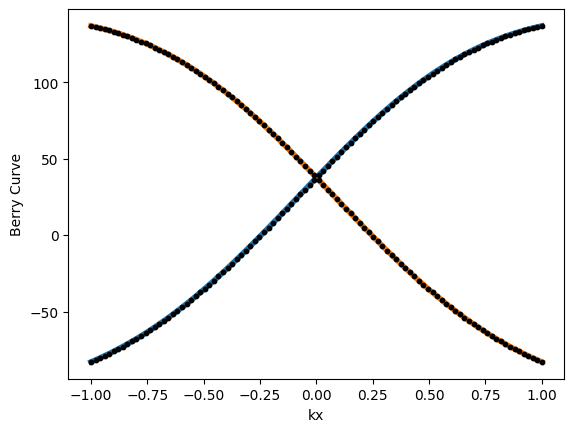

In [ ]:
#=================================
'''
    TESTING STUFF
    Tentando inplementar o braket entre NÍVEIS
    Para uma direção apenas!
'''
#=================================

def compute_berry_curvature(Psi1,Psi2, dx):

    print(f'Evecs shape:{Psi1.shape}')
    # gradX1 = -1j*np.gradient(Psi1[:,0],dx)
    # gradY1 = -1j*np.gradient(Psi1[:,1],dx)
    # gradX2 = -1j*np.gradient(Psi2[:,0],dx)
    # gradY2 = -1j*np.gradient(Psi2[:,1],dx)

    gradX1 = -1j*np.gradient(Psi1,dx)[0]
    gradY1 = -1j*np.gradient(Psi1,dx)[1]

    gradX2 = -1j*np.gradient(Psi2,dx)[0]
    gradY2 = -1j*np.gradient(Psi2,dx)[1]


    # print(f'Grad shape:{gradX1.shape}')

    braketX1 = np.conjugate(Psi1)*gradX2
    braketY1 = np.conjugate(Psi1)*gradY2
    braket1 = braketX1+braketY1

    # braket1 = np.inner(np.conjugate(Psi1[:,0]),grad1)

    braketX2 = np.conjugate(Psi2)*gradX1
    braketY2 = np.conjugate(Psi2)*gradY1
    braket2 = braketX2+braketY2
    # print(f'Braket shape:{braketX.shape}')

    berry_curvature =  -2*(braket1*braket2).imag/10
    # print(f'BerryC shape: {berry_curvature.shape}')
    # print(berry_curvature)
    return berry_curvature

def plot_dispersion1D(m,ky,BZx1,BZx2):
    # Generate a mesh
    kx_range = np.linspace(BZx1, BZx2, num=m)
    # ky_range = np.linspace(BZy1, BZy2, num=n)

    dx = kx_range[1]-kx_range[0]
    print(dx)
    # dy = ky_range[1]-ky_range[0]

    # Get the number of levels with a dummy call (an NxN square matrix has N levels)
    # num_levels = len(mount_Hamiltoninan(1,1))
    # energies = np.zeros((m,n,num_levels)); # initialize
    Psi1 = np.zeros((m,2), dtype=complex)
    Psi2 = np.zeros((m,2), dtype=complex)

    # Now iterate over discretized mesh, to consider each coordinate.
    for i in range(m):
      H = mount_Hamiltoninan(kx_range[i],ky);
      evals, evec = LA.eig(H) # Numerically get eigenvalues and eigenvectors
      Psi1[i] = evec[0]
      Psi2[i] = evec[1]

    BerryCx = compute_berry_curvature(Psi1, Psi2, dx)
    print(f'BerryC shape: {BerryCx.shape}')
    # X, Y = np.meshgrid(kx_range, ky_range) # Generate actual mesh for plotting.

    # print('Are we here?')
    # Plot! There are several ways to style this.
    fig, ax = plt.subplots()
    ax.plot(kx_range, BerryCx[:,0], lw=4)
    ax.plot(kx_range, BerryCx[:,1], lw=4)
    ax.scatter(kx_range, BerryCx[:,0], color='k',s=10,zorder=2)
    ax.scatter(kx_range, BerryCx[:,1], color='k',s=10,zorder=2)
    # ax.set_xlim(-0.25,0.25)
    ax.set_xlabel('kx')
    ax.set_ylabel('Berry Curve')
    plt.show()

# Run it!
BZx1=-1;
BZx2=+1;
res = 100

ky = 0
plot_dispersion1D(res,ky,BZx1,BZx2)

ky = np.pi/2
plot_dispersion1D(res,ky,BZx1,BZx2)

\begin{equation}
  \sigma_{v}^{e} =
  \frac{e^2}{\hbar}
  \int_{E_g / 2}^{E_f}dE
  \frac{2}{\pi (\hbar v_f)^2}
  E
  \frac{2b^2 t^2 }{ E_{g}'^{2} }
\end{equation}

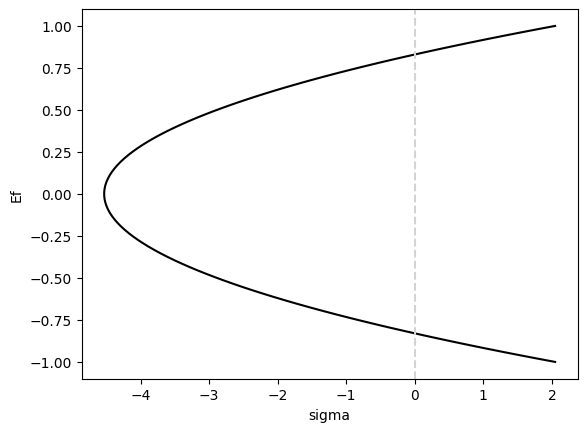

In [ ]:
#--------------------------------------------
#  Tentando integrar condutividade
#--------------------------------------------
import scipy as sp
b = 3.193*1e-8    # angstrom to cm
t = 1.10
Eg = 1.66
Ef=2.00
DeltaSO = 0.15/2
charge = 1.6e-19 # Coulombs
charge = 1 # eV
Effgap = Eg - sz*DeltaSO # signal is -+

hbar = 6.582e-16 # eV s
vf = 1e7         # cm/s

#--------------------------------------
# Numerical integration by quad
# sigma variando Ef!!!
#--------------------------------------
size = 100
Energies = np.linspace(-5,5,size)

def conduct(E):
  top = (2*b*t)**2
  bottom = np.pi*(hbar*vf*Effgap)**2

  integrand = (top/bottom[0,0])*E

  return integrand

loweLim = Eg/2
topLim = np.linspace(-1,1,100)
sigma = np.array([])

for Ef in topLim:
  integral = sp.integrate.quad(conduct, a=loweLim, b=Ef)[0]
  sigma = np.append(sigma, integral)


fig,ax1 = plt.subplots()
ax1.plot(sigma, topLim, color='k')

ax1.set_ylabel('Ef')
ax1.set_xlabel('sigma')
# ax1.set_xlim(-0.5,1)

plt.axvline(x=0, ls='--', color='lightgray', )

plt.show()

\begin{equation}
  \sigma_{v}^{e} =
  \frac{2b^2 t^2 }{\pi \hbar^2 v_{f}^{2} E_{g}'^{2} }
  \left(
    E_f^2
    -\frac{E_g^2}{4}  
  \right)\frac{e^2}{\hbar}
\end{equation}

[1.52573058e-15 3.17545372e-16]
[3.17545372e-16 1.52573058e-15]
[-0.95959596 -0.85858586]
[0.85858586 0.95959596]
1.8181818181818175


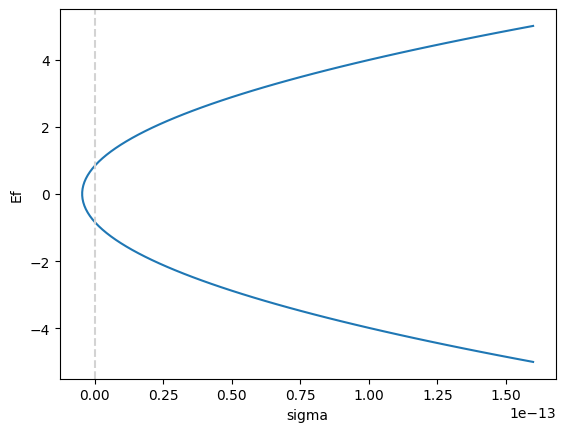

In [ ]:
#--------------------------------------------
#  Tentando fazer condutividade já integrada
#  Escala está dando errado
#--------------------------------------------

b = 3.193*1e-8
t = 1.10
Eg = 1.66
Ef=2.00
DeltaSO = 0.15/2
charge = 1.6e-19 # Coulombs
# charge = 1 # eV
Effgap = Eg - sz*DeltaSO # signal is -+

hbar = 6.582e-16 # eV s
vf = 1e7 # m/s

def conduct(Ef):
  top = 2*b**2 * t**2
  bottom = np.pi*(hbar*vf*Effgap)**2
  evidence = Ef**2 - (Eg**2 / 4)

  conduct = (top/bottom[0,0]) * evidence * (charge**2/hbar)

  # eigen = LA.eigvals(conduct)
  return conduct

size = 100
E = np.linspace(-5,5,size)

sigma = np.zeros(size)
for i in range(size):
  sigma[i] = conduct(E[i])*1e-15

  # if sigma[i] < 1e-1 and sigma[i] >= 0:
  #   print(i)

print(sigma[40:42])
print(sigma[58:60])

print(E[40:42])
print(E[58:60])

print(E[58]-E[40])
fig,ax = plt.subplots()
ax.plot(sigma,E)

ax.set_ylabel('Ef')
ax.set_xlabel('sigma')
plt.axvline(x=0, ls='--', color='lightgray')

# Effective mass term

Hamiltonian:
[[ 1.83  +0.j  0.0375+0.j]
 [ 0.0375+0.j -1.755 +0.j]]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


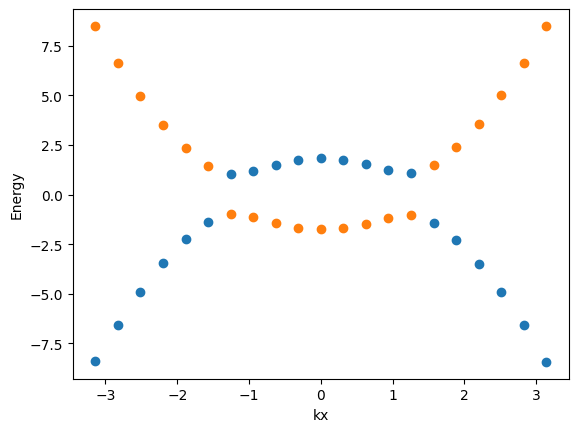

In [ ]:
'''
  doesnt work in 3D for some reason
'''

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.physics.quantum import TensorProduct


# Parameters
b = 3.193   # angstrom
t = 0.25    # eV
Eg = 1.66   # eV
DeltaSO = 0.15/2   # eV
M = 1

hbar = 6.582e-16 # eV s

# Pauli Matrices
sig_x = np.array([[0,1],[1,0]])
sig_y = np.array([[0,-1j],[1j,0]])
sig_z = np.array([[1,0],[0,-1]])
# sz = (-hbar/2) * sig_z
# sz = np.array([[1,0],[0,-1]])
#-----------------------------

# Generate Hamiltonian
#----------------------------

def mount_heavyH(kx,ky,valley):
  if valley:
    tau = 1
  else:
    tau = -1

  I = b*t* (tau* kx*sig_x + ky*sig_y)           # First term
  II = Eg*sig_z/2                               # Second term
  III = DeltaSO * tau*((sig_z-1)/2)* (1)        # Third term
  IV = (M - (kx**2+ky**2))*sig_z                        # Mass

  H = (I + II - III + IV)
  return H

def plot_dispersion2D(n,BZlim,spin):
    # Generate a mesh
    kx_range = np.linspace(-BZlim, BZlim, num=n)
    # ky_range = np.linspace(-BZlim, BZlim, num=n)

    # Get the number of levels with a dummy call (an NxN square matrix has N levels)
    num_levels = len(mount_heavyH(1,1,True))
    # energies = np.zeros((m,n,num_levels)); # initialize
    PsiC = np.zeros((n,num_levels), dtype=complex)
    PsiV = np.zeros((n,num_levels), dtype=complex)
    energies = np.zeros((n,num_levels), dtype=complex)
    # Now iterate over discretized mesh, to consider each coordinate.
    for i in range(n):
      H = mount_heavyH(kx_range[i],0,spin);
      evals, evec = LA.eig(H) # Numerically get eigenvalues and eigenvectors
      energies[i,:]=evals
      PsiC[i] = evec[0] # CBM
      PsiV[i] = evec[1] # VBM

    return energies,PsiC,PsiV,kx_range


# projC = np.zeros((res,2))
# projV = np.zeros((res,2))
# for i in range(res):
#   for j in range(res):
#     projV = np.inner(np.conjugate(PsiV[j,i]), PsiV[j,i])
#     projC = np.inner(np.conjugate(PsiC[j,i]),(-1)* PsiC[j,i])

#     if proj1 > 0:
#       # print('up!')
#       proj1T[j,i] = 1
#     else:

#       proj1T[j,i] = -1

#     if proj2 > 0:
#       # print('DOWN!')
#       proj2T[j,i] = -1
#     else:
#       proj2T[j,i] = -1

H = mount_heavyH(0,0,True)
print(f'Hamiltonian:\n{H}')

rng = np.pi
res = 21
E,PsiC,PsiV,kx_range = plot_dispersion2D(res,rng,True)

X, Y = np.meshgrid(kx_range, kx_range) # Generate actual mesh for plotting.
# Plot! There are several ways to style this.
num_levels = len(mount_heavyH(0,0,True))
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=0, azim=90, roll=0)
# ax.axis([X.min(), X.max(), Y.min(), Y.max()])
# transparency = 0.7 #transparency
# ax.set_zlabel('E')

fig, ax = plt.subplots()
K = int(res/2)
for band in range(num_levels):
  ax.scatter(kx_range, E[:,band])
  # ax.scatter(X,Y, E[:,:,band])
ax.set_xlabel('kx')
ax.set_ylabel('Energy')
plt.show()

# Nanoribbon

In [ ]:
#======================================================================
# Basic Parameters , packages & Working Functions --> ALWAYS EXECUTE
#======================================================================

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.physics.quantum import TensorProduct


# Parameters
b = 3.193   # angstrom
t = 0.25    # eV
Eg = 1.66   # eV
DeltaSO = 0.15/2   # eV
M = 1

hbar = 6.582e-16 # eV s

# Pauli Matrices
sig_x = np.array([[0,1],[1,0]])
sig_y = np.array([[0,-1j],[1j,0]])
sig_z = np.array([[1,0],[0,-1]])
# sz = (-hbar/2) * sig_z
# sz = np.array([[1,0],[0,-1]])
#-----------------------------

# Generate Hamiltonian
#----------------------------

def mount_heavyH(kx,ky,valley):
  if valley:
    tau = 1
  else:
    tau = -1

  I = b*t* (tau* kx*sig_x + ky*sig_y)           # First term
  II = Eg*sig_z/2                               # Second term
  III = DeltaSO * tau*((sig_z-1)/2)* (1)        # Third term
  IV = (M - (kx**2+ky**2))*sig_z                        # Mass

  H = (I + II - III + IV)
  return H

def plot_dispersion2D(n,BZlim,spin):
    # Generate a mesh
    kx_range = np.linspace(-BZlim, BZlim, num=n)
    # ky_range = np.linspace(-BZlim, BZlim, num=n)

    # Get the number of levels with a dummy call (an NxN square matrix has N levels)
    num_levels = len(mount_heavyH(1,1,True))
    # energies = np.zeros((m,n,num_levels)); # initialize
    PsiC = np.zeros((n,num_levels), dtype=complex)
    PsiV = np.zeros((n,num_levels), dtype=complex)
    energies = np.zeros((n,num_levels), dtype=complex)
    # Now iterate over discretized mesh, to consider each coordinate.
    for i in range(n):
      H = mount_heavyH(kx_range[i],0,spin);
      evals, evec = LA.eig(H) # Numerically get eigenvalues and eigenvectors
      energies[i,:]=evals
      PsiC[i] = evec[0] # CBM
      PsiV[i] = evec[1] # VBM

    return energies,PsiC,PsiV,kx_range


# projC = np.zeros((res,2))
# projV = np.zeros((res,2))
# for i in range(res):
#   for j in range(res):
#     projV = np.inner(np.conjugate(PsiV[j,i]), PsiV[j,i])
#     projC = np.inner(np.conjugate(PsiC[j,i]),(-1)* PsiC[j,i])

#     if proj1 > 0:
#       # print('up!')
#       proj1T[j,i] = 1
#     else:

#       proj1T[j,i] = -1

#     if proj2 > 0:
#       # print('DOWN!')
#       proj2T[j,i] = -1
#     else:
#       proj2T[j,i] = -1

H = mount_heavyH(0,0,True)
print(f'Hamiltonian:\n{H}')

rng = np.pi
res = 21
E,PsiC,PsiV,kx_range = plot_dispersion2D(res,rng,True)

X, Y = np.meshgrid(kx_range, kx_range) # Generate actual mesh for plotting.
# Plot! There are several ways to style this.
num_levels = len(mount_heavyH(0,0,True))
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=0, azim=90, roll=0)
# ax.axis([X.min(), X.max(), Y.min(), Y.max()])
# transparency = 0.7 #transparency
# ax.set_zlabel('E')

fig, ax = plt.subplots()
K = int(res/2)
for band in range(num_levels):
  ax.scatter(kx_range, E[:,band])
  # ax.scatter(X,Y, E[:,:,band])
ax.set_xlabel('kx')
ax.set_ylabel('Energy')
plt.show()

[[ 4  0]
 [ 0 -4]]
